# TASK 1- PREDICTION USING SUPERVISED MODEL

### Predict the percentage of study hours of a student


## Presentor: Vigneswari Geethika Angi

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model

#### Reading the data set

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Load the data")
df


Load the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [35]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALIZATION

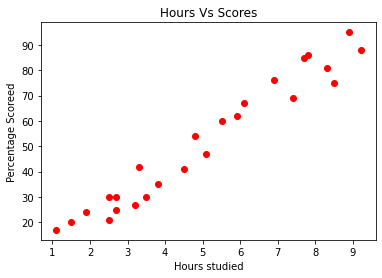

In [8]:
plt.scatter(df['Hours'], df['Scores'], color='Red',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [10]:
df.corr

<bound method DataFrame.corr of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

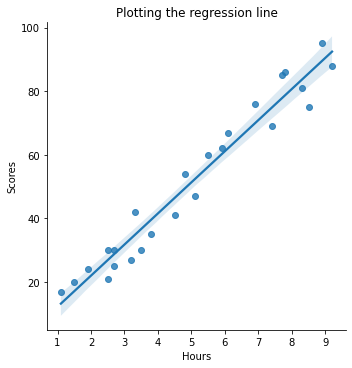

In [36]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=df)

### TRAIN AND SPLIT

In [37]:
#X will take all the values except for the last column which is our dependent variable i.e target variable
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [38]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [39]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Training the simple Linear Regression Model on the training set

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [42]:
#plotting the regression line
line= regressor.coef_*x+regressor.intercept_

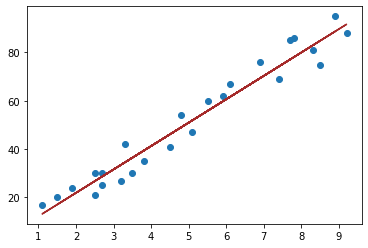

In [43]:
#plotting for test data
plt.scatter(x,y)
plt.plot(x, line, color='brown');
plt.show()

In [44]:
# predicting the test results
y_pred=regressor.predict(x_test)
print(y_pred)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


## Visualising the Training Set Results

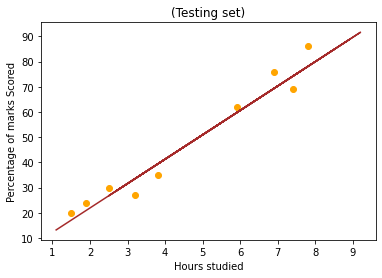

In [45]:
plt.scatter(x_test, y_test, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'brown')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks Scored')
plt.show()

## Prediction of the percentage

In [47]:
data= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


## Predicting the scores

In [48]:
data= np.array(9.25)
data= data.reshape(-1,1)
pred= regressor.predict(data)
print("If the student studies for 9.25 hrs/day, the score is {}.".format(pred))

If the student studies for 9.25 hrs/day, the score is [92.14523315].


## Error metrics

In [49]:
from sklearn import metrics

In [50]:
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))

mean absolute error: 4.691397441397438


In [52]:
from sklearn.metrics import r2_score
print('the r_square of the model: ', r2_score(y_test, y_pred))

the r_square of the model:  0.955570080138813


## Conclusion

### With the use of linear regression we predicted that if a student studies for 9.25 hrs daily the predicted score came out to be 92.14523315